<a href="https://colab.research.google.com/github/AlbusDracoSam/NLP/blob/main/LSTM_Stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [5]:
import pandas_datareader as pdr
import pandas as pd
key="0309c5a7d6e3fa8ae3c80f24b9232f98b64c846e"

# Fetching data

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key = key)

# Saving the data

In [4]:
df.to_csv('Apple.csv')

# Data

*We have the data till July 2, 2021 it means that we are having the data right two days before*

*So we have the data from July,2016 to July,2021*

In [29]:
df.head()

close   high  ...  divCash  splitFactor
symbol date                                     ...                      
AAPL   2016-07-06 00:00:00+00:00  95.53  95.66  ...      0.0          1.0
       2016-07-07 00:00:00+00:00  95.94  96.50  ...      0.0          1.0
       2016-07-08 00:00:00+00:00  96.68  96.89  ...      0.0          1.0
       2016-07-11 00:00:00+00:00  96.98  97.65  ...      0.0          1.0
       2016-07-12 00:00:00+00:00  97.42  97.70  ...      0.0          1.0

[5 rows x 12 columns]

In [30]:
df.tail()

close     high  ...  divCash  splitFactor
symbol date                                        ...                      
AAPL   2021-06-28 00:00:00+00:00  134.78  135.245  ...      0.0          1.0
       2021-06-29 00:00:00+00:00  136.33  136.490  ...      0.0          1.0
       2021-06-30 00:00:00+00:00  136.96  137.410  ...      0.0          1.0
       2021-07-01 00:00:00+00:00  137.27  137.330  ...      0.0          1.0
       2021-07-02 00:00:00+00:00  139.96  140.000  ...      0.0          1.0

[5 rows x 12 columns]

# Selecting the data

*we are gonna select the closing stock price*

In [12]:
df1 = df.reset_index()['close']
df1.shape
df1

0        95.53
1        95.94
2        96.68
3        96.98
4        97.42
         ...  
1253    134.78
1254    136.33
1255    136.96
1256    137.27
1257    139.96
Name: close, Length: 1258, dtype: float64

# Plotting the data

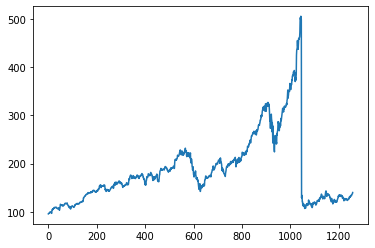

In [13]:
import matplotlib.pyplot as plt
plt.plot(df1)

# Scaling the data

*Since LSTM are more sensitive to scale of the data. So we apple a* **MinMax** *scaler to scale the data between 0 and 1.*

In [14]:
df1

0        95.53
1        95.94
2        96.68
3        96.98
4        97.42
         ...  
1253    134.78
1254    136.33
1255    136.96
1256    137.27
1257    139.96
Name: close, Length: 1258, dtype: float64

In [16]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
print(df1)

[[0.        ]
 [0.00099864]
 [0.00280105]
 ...
 [0.10091095]
 [0.10166602]
 [0.10821804]]


# Train Test Split

*In Time series data split the data should be splitted in a different manner. In classification and linear problems the data set can be either splitted in **Cross validation or Random seed** since there will be no relationship between the data.*

*While in time series data the data is completely dependent so we do as follows.*

In [28]:
train_size = (len(df1) * 0.65)
test_size = len(df1) - train_size
train_data, test_data = df1[0:int(train_size),:], df1[int(train_size):len(df1),:1]
print(len(train_data),len(test_data))


817 441


# Time series

In [31]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [39]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(716, 100)
(340, 100)
(716,)
(340,)


# Reshaping the data

In [42]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Stacked LSTM model

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [44]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [45]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size=64, verbose=1, epochs=100)

Epoch 1/100
12/12 [==============================] - 9s 303ms/step - loss: 0.0075 - val_loss: 0.0387
Epoch 2/100
12/12 [==============================] - 2s 203ms/step - loss: 0.0018 - val_loss: 0.0256
Epoch 3/100
12/12 [==============================] - 2s 203ms/step - loss: 9.4196e-04 - val_loss: 0.0213
Epoch 4/100
12/12 [==============================] - 2s 202ms/step - loss: 5.8755e-04 - val_loss: 0.0199
Epoch 5/100
12/12 [==============================] - 2s 201ms/step - loss: 4.7202e-04 - val_loss: 0.0204
Epoch 6/100
12/12 [==============================] - 2s 197ms/step - loss: 4.8207e-04 - val_loss: 0.0196
Epoch 7/100
12/12 [==============================] - 2s 198ms/step - loss: 4.1237e-04 - val_loss: 0.0189
Epoch 8/100
12/12 [==============================] - 2s 202ms/step - loss: 4.0525e-04 - val_loss: 0.0185
Epoch 9/100
12/12 [==============================] - 2s 196ms/step - loss: 3.8632e-04 - val_loss: 0.0181
Epoch 10/100
12/12 [==============================] - 2s 196ms/

# Prediction and plot

In [46]:
import tensorflow as tf

In [47]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

**Rescaling**

In [48]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

**Calculating TMSE**

In [51]:
import math
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(y_train, train_predict)))
print(math.sqrt(mean_squared_error(y_test, test_predict))) 

176.46060620315018
231.73364330015855


# Plot

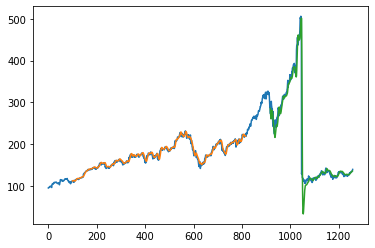

In [52]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Predicting next 30 days

We used a time stamp of 100 above. It states that to predict the stock price at a particular data we need 100 days price before that.

In [64]:
len(test_data)

441

In [69]:
X_input = test_data[341:].reshape(1,-1)
X_input.shape 

(1, 100)

In [72]:
temp_input=list(X_input)
temp_input=temp_input[0].tolist()

In [73]:

# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        X_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,X_input))
        X_input=X_input.reshape(1,-1)
        X_input = X_input.reshape((1, n_steps, 1))
        #print(X_input)
        yhat = model.predict(X_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        X_input = X_input.reshape((1, n_steps,1))
        yhat = model.predict(X_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.10258797]
101
1 day input [0.09645362 0.09703819 0.09172837 0.08600448 0.08325214 0.08364186
 0.07421571 0.07387471 0.0726325  0.06201286 0.0626705  0.0785756
 0.07207229 0.06461906 0.05991816 0.06306021 0.05073558 0.06224425
 0.05955281 0.06437549 0.06211029 0.06931995 0.07316836 0.07119544
 0.06089244 0.05957716 0.06785853 0.06578819 0.05982073 0.06103858
 0.06254871 0.06298714 0.05935795 0.06483827 0.06690861 0.07397214
 0.0747272  0.07884353 0.08483535 0.09125341 0.08697876 0.09474864
 0.08890296 0.09491913 0.094091   0.09574727 0.09153352 0.09248344
 0.08868375 0.09448071 0.09545499 0.09465121 0.09267829 0.09243472
 0.08751461 0.09014517 0.07872175 0.07933067 0.08332521 0.08446999
 0.07628605 0.07399649 0.0663484  0.07170694 0.07774747 0.07487334
 0.07141465 0.07102494 0.07740647 0.07282736 0.07689497 0.07640783
 0.07628605 0.072462   0.07083009 0.07002631 0.07192615 0.06822389
 0.07394778 0.07397214 0.07601812 0.07696804 0.07448363 0.0775039
 0.08512763 0.08308164 0.08432385 0

In [74]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

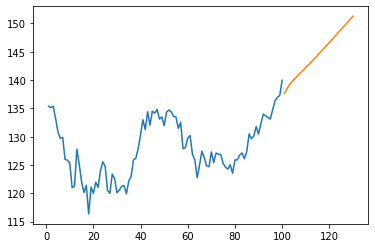

In [75]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

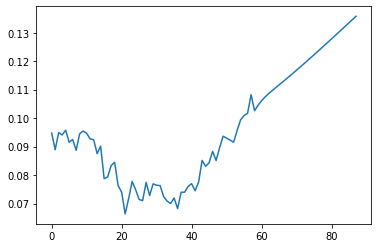

In [76]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])